# <center><b>Predicting Gross Domestic Investment in the United States </b></center>
<center> By: Kabir A. Patel </center>

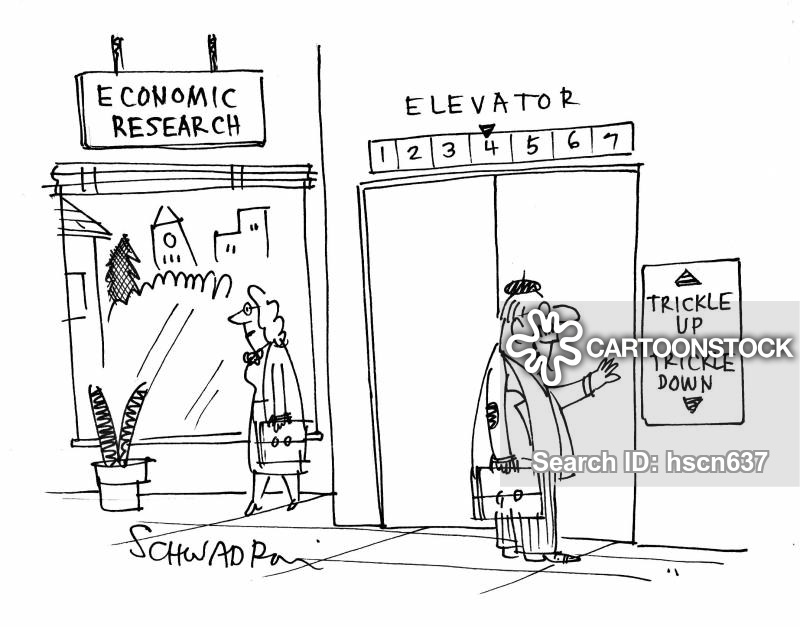

# Motivation
The total Gross Domestic Product (GDP) for the United States is derived by summing up 4 things namely: Consumption Expenditure, Private Investment, Government Spending, and Net Exports. Consumption Expenditure makes up for about 70% of the GDP, Private Investment makes for about 20%, Govt. Spending makes for 9% and Net Exports about < 1%. <br>
Now, Private investment is only 20%, but is the most volatile out of the other factors. It means Private Investment changes signinficantly and rapidly whenever there is economic boom or economic downturn. Private Investment basically includes the capital spent by business to purchase assets like machinary, equipments, land etc. More details about terminology can be found <a href="http://www.amosweb.com/cgi-bin/awb_nav.pl?s=wpd&c=dsp&k=investment+expenditures#:~:text=INVESTMENT%20EXPENDITURES%3A,and%20long%2Drun%20economic%20growth.">here.</a> <br> 
However, traditionally when politicians and economists argue about Private Investment, people are either for or against raising corporate taxes/ tax breaks to big businesses. People who argue that lower taxes on businesses make them invest within U.S. as their corporate income after taxes is higher that way. They argue this also leads to higher employment within the country and other benefits. This type of theory is called Trickle Down Economics. You can read more about it <a href="https://www.investopedia.com/terms/t/trickledowntheory.asp">here.</a><br>
However, lot of recent publications like <a href="">this one,</a> argue that Trickle Down Effect does not work in reality. So, in this tutorial we make a model using data queried from <a href="https://wrds-www.wharton.upenn.edu/">Wharton Research Data Services (WRDS).</a> Then we test our model against real aggregate variables for the Economy with data from <a href="https://fred.stlouisfed.org/">FRED.</a> This model will take in mulitple independent variable including income after taxes for businesses and predict the cpaital expenditure for a given period. If we have a reasonable model, we will have showed that taxes are not the only varibale to be considered. Hence we will have moved in a direction to disprove 'trickle down economics'


<a href="https://fred.stlouisfed.org/">FRED.</a>

# Roadmap

Data Collection - source: WRDS <br>
Data Wrangling <br>
Exploratory Data Analysis <br>
Building Linear Model <br>
Data Collection (for testing) - source: FRED <br>
Data Organizing & Visualizing <br>
Testing <br>
Policy and Insight <br>

In [1]:
#Libraries needed for the data collection and visualization process.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection

This data from WRDS ranges across the years 1950 to 2020. This is annual data. So, for each year there is data on about 11,000 companies. The data contains things that would appear on the firms' balance sheets. The varibales we query are described below. Also, not that these would just be all public companies. Private business, small businesses, and the 'mom & pops shops' will not be included in this data.<br>
The query that I used to get the data in a CSV file with needed variables from WRDS can be found <a href="https://wrds-web.wharton.upenn.edu/wrds/ds/compd/tools/finstateextract.cfm?navId=83">here.</a>

In [2]:
#Reading the csv file into as pandas DataFrame
firms = pd.read_csv('1950-2020.csv')
firms

,gvkey,data_date,fyear,tic,assets,capx,cost,depr,income,liabl
0,1000,19611231,1961.0,AE.2,NaN,NaN,NaN,NaN,0.050,NaN
1,1000,19621231,1962.0,AE.2,NaN,NaN,NaN,NaN,0.120,NaN
2,1000,19631231,1963.0,AE.2,NaN,NaN,1.065,NaN,0.003,0.345
3,1000,19641231,1964.0,AE.2,1.416,NaN,1.474,NaN,0.039,0.809
4,1000,19651231,1965.0,AE.2,2.310,NaN,1.342,NaN,-0.197,1.818
...,...,...,...,...,...,...,...,...,...,...
524310,335466,20171231,2017.0,HOFSQ,NaN,NaN,NaN,NaN,NaN,NaN
524311,335466,20181231,2018.0,HOFSQ,191.074,0.045,27.388,17.657,-197.294,137.010
524312,335466,20191231,2019.0,HOFSQ,201.909,0.000,35.361,10.747,-19.116,149.781
524313,339965,20190131,2018.0,SNOW,764.288,4.016,50.391,7.036,-178.028,165.902


Brief Description of the column titles that are relevant for this tutorial:<br><br>
<b>fyear:</b>  denotes the fiscal year<br>
<b>tic:</b>    denotes the ticker symbol under which this comapny is displayed on its stock exchange<br>
<b>assets:</b> denotes total assets of the company in that fiscal year<br>
<b>capx:</b>   denotes the capital expenditure by the company in that fiscal year<br>
<b>depr:</b>   dentotes the dollar value of the amount of depreciation occured in the companies assets in that year<br>
<b>income:</b> denotes the income after accounting for costs and taxes<br>
<b>liabl:</b>  denotes total liabilities of the company in that year<br>


# Data Wrangling 

Firstly, we change divide all the values in the columns 'assets', 'capx', 'cost', 'depr', 'income', and 'liabl' by 1000. We do this to make those dollar amounts from millions of dollars (as indicated by WRDS) to billions of dollars. We do this because the data we test our model on later has units as billions of dollars.

In [3]:
firms['assets'] = firms['assets'].div(1000)
firms['capx'] = firms['capx'].div(1000)
firms['cost'] = firms['cost'].div(1000)
firms['depr'] = firms['depr'].div(1000)
firms['income'] = firms['income'].div(1000)
firms['liabl'] = firms['liabl'].div(1000)

'Net_savings' is one of our independent varible. and the formula to calculate that given a company's balance sheet is to subtract total liabilities from total assets. 

In [4]:
firms['net_savings'] = firms['assets'] - firms['liabl']

Note, going forward 'capx' is the Dependent Variable and the Independent Varibles are: 'depr', 'income', 'net_savings'

In [5]:
firms

,gvkey,data_date,fyear,tic,assets,capx,cost,depr,income,liabl,net_savings
0,1000,19611231,1961.0,AE.2,NaN,NaN,NaN,NaN,0.000050,NaN,NaN
1,1000,19621231,1962.0,AE.2,NaN,NaN,NaN,NaN,0.000120,NaN,NaN
2,1000,19631231,1963.0,AE.2,NaN,NaN,0.001065,NaN,0.000003,0.000345,NaN
3,1000,19641231,1964.0,AE.2,0.001416,NaN,0.001474,NaN,0.000039,0.000809,0.000607
4,1000,19651231,1965.0,AE.2,0.002310,NaN,0.001342,NaN,-0.000197,0.001818,0.000492
...,...,...,...,...,...,...,...,...,...,...,...
524310,335466,20171231,2017.0,HOFSQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN
524311,335466,20181231,2018.0,HOFSQ,0.191074,0.000045,0.027388,0.017657,-0.197294,0.137010,0.054064
524312,335466,20191231,2019.0,HOFSQ,0.201909,0.000000,0.035361,0.010747,-0.019116,0.149781,0.052128
524313,339965,20190131,2018.0,SNOW,0.764288,0.004016,0.050391,0.007036,-0.178028,0.165902,0.598386


Now, we group the data by years and sum data across all companies for every year. So, every row represents 1 fiscal year and total capital expenditure, depr, etc in that year. 

In [6]:
yearly = firms.groupby('fyear', as_index = False).sum()

In [7]:
yearly

,fyear,gvkey,data_date,assets,capx,cost,depr,income,liabl,net_savings
0,1950.0,4187848,12968788678,96.826474,6.629338,63.062449,0.000000,9.621518,31.235285,52.702389
1,1951.0,5871024,15765558616,139.332781,9.821522,75.070429,0.000000,9.665282,37.420320,58.671361
2,1952.0,5918731,15890792686,153.533408,11.236636,83.085456,0.000000,9.673127,40.462113,63.782295
3,1953.0,5981554,16094243094,165.989555,11.494645,93.615913,0.000000,10.711888,45.665715,72.936940
4,1954.0,6065520,16415168983,180.729844,11.981749,91.516606,0.000000,11.923122,43.381593,73.767271
...,...,...,...,...,...,...,...,...,...,...
66,2016.0,991017510,227689016545,113766.366820,2002.550562,17540.406790,1739.343967,1673.970032,93441.757057,20319.860272
67,2017.0,951832328,225966093410,120816.636676,2090.491731,19155.315642,1836.336181,2225.763268,98543.140107,22267.676029
68,2018.0,914635661,223736687475,119961.419590,2225.514416,19784.490303,1818.882150,2291.250854,97787.478871,22166.964178
69,2019.0,862994843,216133905933,125400.794896,2211.986861,20188.751469,1995.247825,2251.648633,102591.238408,22797.884662


# Exploratoray Data Analysis and Visualization

Now we plot capx against each of the independent varibale and see what the general relationship is. 

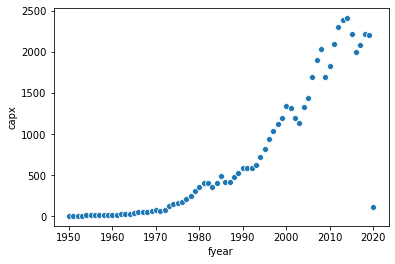

In [8]:
#This plot is just fiscal year vs capx. Fiscal year is not an independent varibale here. This is just to show the trend
sns.scatterplot(x = 'fyear', y = 'capx', data = yearly)

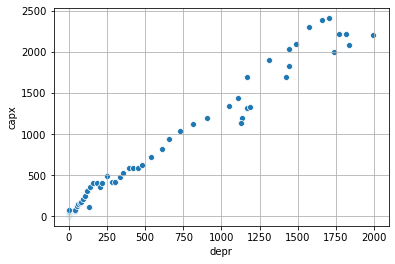

In [9]:
sns.scatterplot(x = 'depr', y = 'capx', data = yearly)
plt.grid(True)

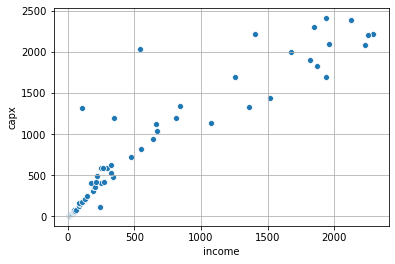

In [10]:
sns.scatterplot(x = 'income', y = 'capx', data = yearly)
plt.grid(True)

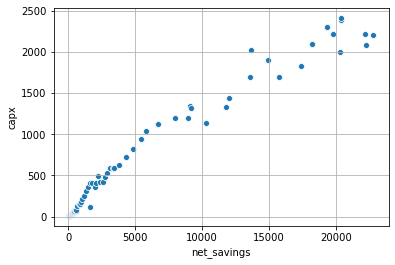

In [11]:
sns.scatterplot(x = 'net_savings', y = 'capx', data = yearly)
plt.grid(True)

Increase in capx with increase in income (after adjusting for tazes) is a relationship we were expecting based on intuition. But we also have similar relationship between capx and the other two varibales. 

# Analysis, Hypothesis Testing and Machine Learning

# Building the Model . . .

Now, we beign to build a model that will predict total Capital Expenditure (capx) for a year given income, depreciation (depr), and net_savings for that year. We will use this full dataset to train our model, i.e. we do not split the data into train and test portions. Instead of using the traditional Cross Validation approach to test and see how good our model is, we will use a domain specific test. It will be clear when we reach the testing phase!

In [12]:
# Libraries need for Data Analysis and building the Model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.formula.api import ols

We try to use the Ordinary Least Squares to fit a linear regression to the data from the 'yearly' table <br>
independent variable: capx
regressors: net_savings, depr, income <br>
Below is the full summary of our results from the regression analysis using the statsmodels library

In [13]:
reg = ols('capx ~ depr + income + net_savings', data = yearly)
model = reg.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   capx   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     1034.
Date:                Mon, 21 Dec 2020   Prob (F-statistic):           5.15e-56
Time:                        19:43:27   Log-Likelihood:                -436.78
No. Observations:                  71   AIC:                             881.6
Df Residuals:                      67   BIC:                             890.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      65.2523     19.001      3.434      0.001      27.327     103.178
depr            1.0659      0.146      7.325      0.000       0.775       1.356
income          0.1205      0.077      1.558      0.124      -0.034       0.275
net_savings     0.0034      0.017      0.199      0.843      -0.031       0.038
==============================================================================
Omnibus:                        4.938   Durbin-Watson:                   0.634
Prob(Omnibus):                  0.085   Jarque-Bera (JB):                6.524
Skew:                          -0.087   Prob(JB):                       0.0383
Kurtosis:                       4.475   Cond. No.                     1.26e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the stats above, we see that the R^2 value is 0.979 which means the model generated is a good fit. Since there were only 71 samples it might have over fitted, but we will find out in the testing section. <br>

Below we apply the 'Sklearn' library's linear regression analysis. The advantage of this is that the linear model is automatically stored which we will need to predict values in the testing section. 

In [14]:
X = yearly[['income', 'depr', 'net_savings']]
y = yearly['capx']

#Fit the linear model to the X, y above.
lin_model = LinearRegression().fit(X,y)
print(lin_model.score(X,y))
print("intercept is " + str(lin_model.intercept_))
print("Coefficient for income is " + str(lin_model.coef_[0]))
print("Coefficient for depr is " + str(lin_model.coef_[1]))
print("Coefficient for net_savings is " + str(lin_model.coef_[2]))

0.9788513962154494
intercept is 65.25229529066371
Coefficient for income is 0.1204676643533248
Coefficient for depr is 1.0659052587551898
Coefficient for net_savings is 0.0034349745613393434


Below we try to fit polynomial models instead of Linear models

In [15]:
#Polynomial model of degree 2
poly = PolynomialFeatures(degree=2)
poly_X = poly.fit_transform(X)
poly_model = LinearRegression().fit(poly_X, y)
poly_model.score(poly_X,y)

0.9880884162068614

In [16]:
#Polynomial model of degree 2
poly = PolynomialFeatures(degree=3)
poly_X = poly.fit_transform(X)
poly_model = LinearRegression().fit(poly_X, y)
poly_model.score(poly_X,y)

0.9916124022397016

We see that there is an increase in R^2 values. as we increase the degree of the polynomial. However, we stick with the linear model for 2 reasons:<br>
1. Based on the chart we see that there is a linear correlation betweem capx and all three variables<br>
2. With higher degrees there is a chance of over-fitting the model.

# Towards Testing . . . 

# Some More Data Collection First

Now, for testing we choose actual aggregate data about the whole US Economy from Federal Reserve St. Louis (FRED) data website hyperlinked in the the introduction above. This is a government website which has data about macroeconomic variabels like total consumer expenditure, change in GDP etc over the years.<br> <br>
So, we grab some more data from FRED st. Louis..

Here are the links for data that we are interested in:<br>
https://fred.stlouisfed.org/series/GPDIC1 <br>
https://fred.stlouisfed.org/series/CP <br>
https://fred.stlouisfed.org/series/TNWMVBSNNCB <br>
https://fred.stlouisfed.org/series/M1PTOTL1ES000 <br>

all of these are quarterly data from 1947 to 2020, except depreciation (in the last link above)

In [17]:
# While downloading, each variable had its own website so we have multiple CSVs.
#So we read each csv to a dataframe and then combine the data in one dataframe 

one = pd.read_csv('FRED_gross_investment.csv')
two = pd.read_csv('FRED_gross_private_income.csv')
three = pd.read_csv('FRED_total_depreciation.csv')
four = pd.read_csv('FRED_savings.csv')

#data on total depreceiation in the US was annual so we pad each year's data 
#to all its quarters to match with quarterly data of other variables. 
x = [item for item in three['depreciation'] for i in range(4)]

#The data for last three quarters is missing in the depreciation column
#so we just pad the depreciation value in billions from the previous quarter to 
#the latest three quarters. 
for i in range(3):
    x.append(2960)

macro = pd.DataFrame()
macro['date'] = one['DATE']
macro['investment'] = one['gross_investment']
macro['private_income'] = two['corporate_profits']
macro['depreciation'] = x
macro['savings_level'] = four['gross_net_savings']

In [18]:
macro

,date,investment,private_income,depreciation,savings_level
0,1947-01-01,218.091,21.970,17.7,269.729
1,1947-04-01,201.386,20.788,17.7,269.729
2,1947-07-01,195.461,20.564,17.7,269.729
3,1947-10-01,233.284,22.451,17.7,269.729
4,1948-01-01,257.220,23.739,20.8,270.600
...,...,...,...,...,...
290,2019-07-01,3445.703,1920.338,2832.7,16785.906
291,2019-10-01,3413.313,2000.736,2832.7,15990.217
292,2020-01-01,3333.963,1739.103,2960.0,17193.242
293,2020-04-01,2849.792,1557.064,2960.0,16398.631


'investment' represents capx at economy level here. So, it is literally Gross Domestic Investment for each quarter. <br>
'private_income' is analogous to income in the firms dataframe at national level.<br>
'depreciation' is analogous to depreciation in the firms dataframe at national level. <br>
'savings_level' is analogous to net_savings in the firms dataframe at national level. <br>

Also, we should keep in mind that we took data from only public firms, but Gross Investment in the the US comprises of Private and Public business. So, in general the 'Capx' in our 'firms' Dataframe should be less the actual value of Gross Invetment in the U.S. 

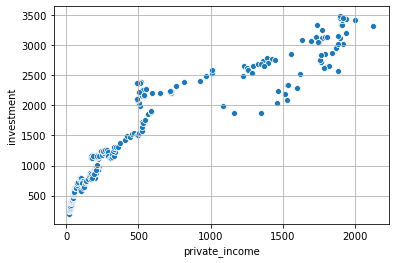

In [19]:
#CHARTS

#Just like we did for the firms data we plot these analogous variables against investment.
#We try to eyeball the charts and ensure that the type of correlations are within the scope of 
#our model to try and predict. 

sns.scatterplot(x = 'private_income', y = 'investment', data = macro)
plt.grid(True)

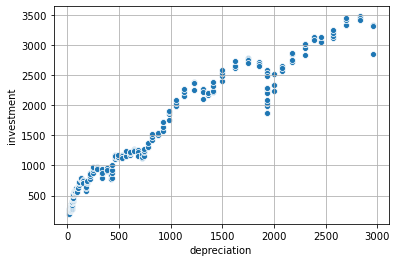

In [20]:
sns.scatterplot(x = 'depreciation', y = 'investment', data = macro)
plt.grid(True)

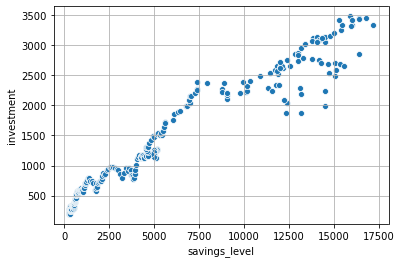

In [21]:
sns.scatterplot(x = 'savings_level', y = 'investment', data = macro)
plt.grid(True)

# Testing . . .

In [22]:
X_test = macro[['private_income', 'depreciation', 'savings_level']]
y_test = macro['investment']

In [23]:
#We predict macroeconomic variable: investment. (actual values are stored in y_test)
y_pred = lin_model.predict(X_test)

In [24]:
#Finding the average absolute deviation per value to see how much a predicted 
#value deviates from the actual values in that quarter on average.

total_dev = 0
for i in range(0, 295):
    total_dev += abs(y_test[i] - y_pred[i])
    
total_dev/295  

366.92884636886316

So we see that on average our predicted value deviates by approx. $366 billion for actual Gross Investment in the U.S. This is a huge dollar amount, but minor compared to the thousands of billions of dollars invested as a part of domestic investment in the U.S.

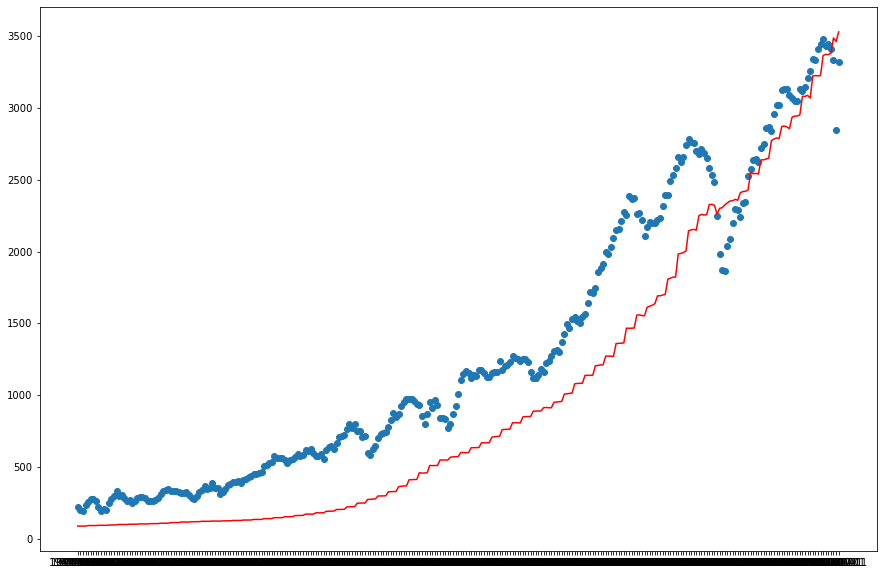

In [25]:
plt.figure(figsize=(15,10))
plt.scatter(macro['date'], y_test)
plt.plot(macro['date'], y_pred, 'r')

The red line in the chart above connects the points resulting from the predicted values for corresponding fiscal quaters based on our model. We can see that the general trend predicted by our model matches the one with data on Gross Private Investmet from FRED. However, there is some deviation in predicted values from the actual values depicted by blued dots. 
Since the data ranges across 295 fiscal quarters, the x-axis is a bit crowded in the chart above. But note that the deviation decreases significanlty after Q3 in the year 2011. So we plot that below to get a better look: 

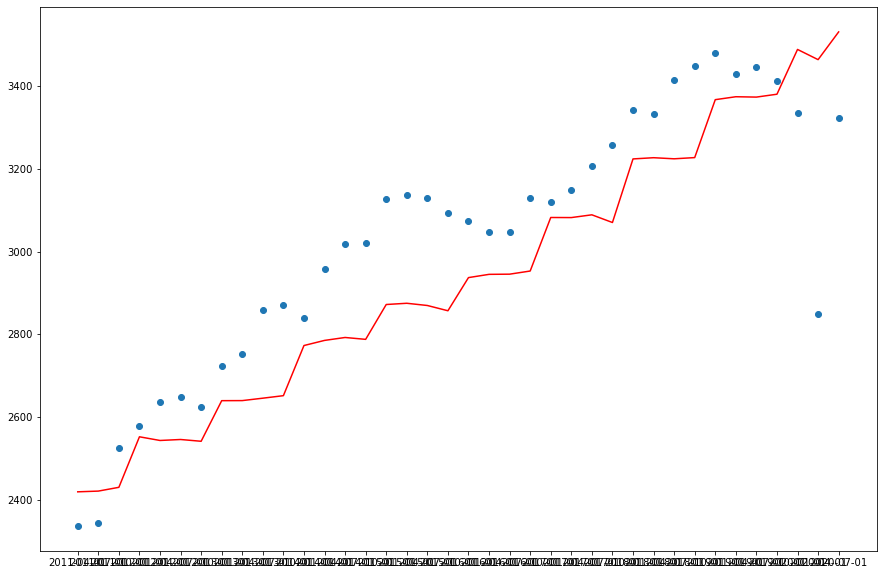

In [26]:
#Plotting same chart as above from 3rd Quarter of 2011 to most recent
new = macro.iloc[-38:]
plt.figure(figsize=(15,10))
plt.scatter(new['date'], y_test[-38:])
plt.plot(new['date'], y_pred[-38:], 'r')

FUN FACT:
Note the last to the second dot that seems like an outlier. That is the third quarter of 2020. It is intuitive why the gross domestic investment is so low. It is due to businesses being shut for the most part.  

# Policy and Insight

Assuming our model was 'successful' based on the standards that it predicts the same general trend of Gross Domestic Investment based on the 3 variables chosen. So, if there are changes in some exogenous variable, and we know its effect on either depreciation, income or net_savings of the corporate US then we can have a general idea which direction the GDI will move in. However, we have not proven any causal relationships. With my limited domain expertise coming from Econmics major, my judgement is restricted. So, we leave causal explanations for the experts! <br><br>
Also, since our model takes in input 2 other variables than just income (after taxes) we have shown that Trickle Down Economics is most likely not a practical theory !

Below are references to some literature in this field of Economics and Statistics:<br>

Voss, Graham M., 2002. "Public and private investment in the United States and Canada," Economic Modelling, Elsevier, vol. 19(4), pages 641-664, August. 

Domar, E. (1953). Depreciation, Replacement and Growth. The Economic Journal, 63(249), 1-32. doi:10.2307/2226748

TED Talk: Hanauer, N. The dirty secret of capitalism -- and a new way forward. Retrieved 13 December 2020, from https://www.ted.com/talks/nick_hanauer_the_dirty_secret_of_capitalism_and_a_new_way_forward?language=en 
